### Approach Overview
1. In this assignment first we will try to attempt the problem without any regularization; Hence we will be doing feature selection using manual techniques like RFE, VIF or p-value analysis.
2. In 2nd approach we won't be doing feature selection; but instead we will perform regularization like Lasso and Ridge with all available features and observe the results.

# APPROACH 1 (Manual Feature Selection and Model Building)

In [1]:
# Importing initial libraries for data reading and processing

import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML 

In [2]:
# Reading the given data into variable named data
data = pd.read_csv("train.csv")
print("Shape of the data: ", data.shape)
data.head()

#We have 1460 data rows with 81 initial features

Shape of the data:  (1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### Initial data preprocessing and null value handling

In [3]:
# Dropping duplicate entries if any
data = data.drop_duplicates()
data.shape

(1460, 81)

In [4]:
#Checking for the % null values in each column
'''
There are few variables given below with few % of missing data
'''

data.isnull().sum()/len(data) *100



Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [5]:
# There are columns having missing values more than 30%
# We will drop such columns from the data

col_list = data.columns[data.isnull().mean() > 0.3]
print(col_list)
data = data.drop(columns = col_list)

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


0

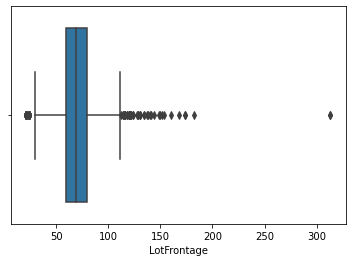

In [6]:
# LotFrontage has 17% missing values; we will handle it by replacing null by median as most of the values are concentrated in small region and have some outliers too 

sns.boxplot(data.LotFrontage)

#Drop otliers from the LotFrontage
data = data[data.LotFrontage <300]

data.LotFrontage.fillna(data.LotFrontage.median())
data.LotFrontage.isnull().sum()

In [7]:
# Checking the Null values again

'''
For the remaining features the missing values are less than 10%
We will drop the rows having such null featuers
'''

data.isnull().sum()/len(data) *100



Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.500417
MasVnrArea       0.500417
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.585488
BsmtCond         2.585488
BsmtExposure     2.668891
BsmtFinType1     2.585488
BsmtFinSF1       0.000000
BsmtFinType2     2.668891
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating     

In [8]:
# There are 0.5% data is missing in Masonry veneer type 
# As the percent missing is very small we can drop the rows with missing values

data = data[-data.MasVnrType.isnull()]
data = data[-data.MasVnrArea.isnull()]

# There are 6% data is missing in garage related data 
# As the percent missing is very small we can drop the rows
data = data[-data.GarageType.isnull()]
data = data[-data.GarageYrBlt.isnull()]
data = data[-data.GarageType.isnull()]
data = data[-data.GarageFinish.isnull()]
data = data[-data.GarageQual.isnull()]
data = data[-data.GarageCond.isnull()]

# There are 3% data is missing in basement related data 
# As the percent missing is very small we can drop the rows
data = data[-data.BsmtQual.isnull()]
data = data[-data.BsmtCond.isnull()]
data = data[-data.BsmtExposure.isnull()]
data = data[-data.BsmtFinType1.isnull()]
data = data[-data.BsmtFinType2.isnull()]
data = data[-data.Electrical.isnull()]

In [9]:
#Checking again for null data
data.isnull().sum()
#Now we don't have null data in rows or colms hence we can proceed further

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1092 non-null   int64  
 1   MSSubClass     1092 non-null   int64  
 2   MSZoning       1092 non-null   object 
 3   LotFrontage    1092 non-null   float64
 4   LotArea        1092 non-null   int64  
 5   Street         1092 non-null   object 
 6   LotShape       1092 non-null   object 
 7   LandContour    1092 non-null   object 
 8   Utilities      1092 non-null   object 
 9   LotConfig      1092 non-null   object 
 10  LandSlope      1092 non-null   object 
 11  Neighborhood   1092 non-null   object 
 12  Condition1     1092 non-null   object 
 13  Condition2     1092 non-null   object 
 14  BldgType       1092 non-null   object 
 15  HouseStyle     1092 non-null   object 
 16  OverallQual    1092 non-null   int64  
 17  OverallCond    1092 non-null   int64  
 18  YearBuil

In [11]:
# Function for outlier detection and removal using IQR if required
'''
Even though the upper and lower bond formulae are as given below

fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

we will still remove otliers avobe 99% and below 1% data
'''

def remove_outlier(df_in, col_name):
    fence_low = df_in[col_name].quantile(0.01)
    fence_high = df_in[col_name].quantile(0.99)
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

## Data Exploration and Analysis

20     410
60     226
50     114
120     66
160     53
70      52
30      47
80      37
90      24
190     19
85      13
75      13
45       9
180      6
40       3
Name: MSSubClass, dtype: int64


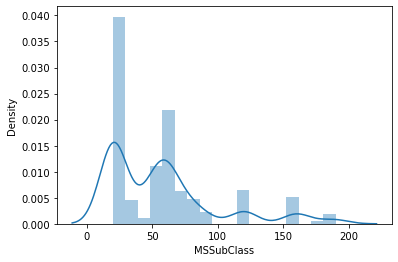

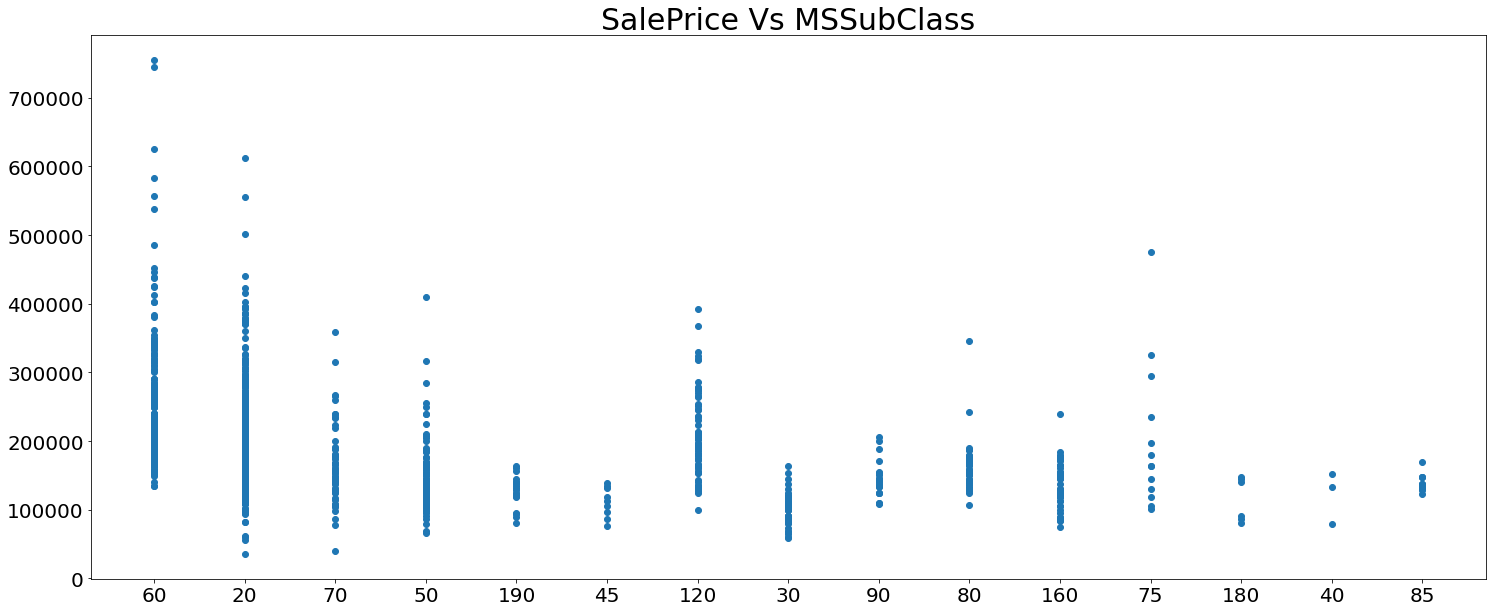

In [12]:
#Analyzing MSSubClass
print(data.MSSubClass.astype('category').value_counts())
sns.distplot(data.MSSubClass.astype('category'))

# Even though the values are in int64, it denotes the different class categories hence converting datatype to obj
data.MSSubClass = data.MSSubClass.astype('object')


plt.figure(figsize=(25,10))
plt.scatter(data["MSSubClass"].astype(str), data["SalePrice"])
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.title("SalePrice Vs MSSubClass", fontsize=30)
plt.show()

RL         848
RM         173
FV          54
RH           9
C (all)      8
Name: MSZoning, dtype: int64


<AxesSubplot:xlabel='MSZoning', ylabel='Count'>

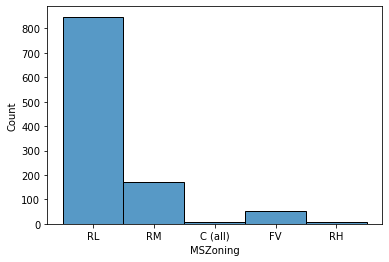

In [13]:
#Analyzing MSZoning
print(data.MSZoning.value_counts())
sns.histplot(data.MSZoning)

# Most of the values are of RL and RM category

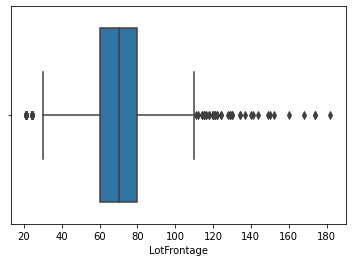

Afer Outlier Removal


<AxesSubplot:xlabel='LotFrontage'>

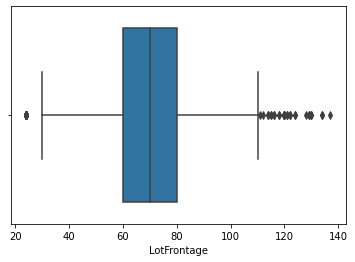

In [14]:
#Analyzing LotFrontage
sns.boxplot(data.LotFrontage)
plt.show()
#There are few outliers in the LotFrontage hence we will remove values beyound 99% data

data = data.loc[(data['LotFrontage'] < data['LotFrontage'].quantile(0.99)) & (data['LotFrontage'] > data['LotFrontage'].quantile(0.01))]
print("Afer Outlier Removal")
sns.boxplot(data.LotFrontage)

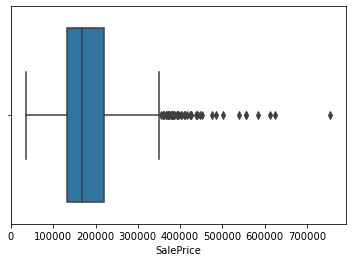

Afer Outlier Removal


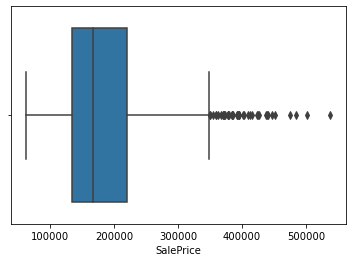

In [15]:
#Analyzing SalePrice
sns.boxplot(data.SalePrice)
plt.show()
#There are few outliers in the SalePrice hence we will remove values beyound 99% data

data = data.loc[(data['SalePrice'] < data['SalePrice'].quantile(0.995)) & (data['SalePrice'] > data['SalePrice'].quantile(0.005))]
print("Afer Outlier Removal")
sns.boxplot(data.SalePrice)
plt.show()

In [16]:
# Checking Street column
data.Street.value_counts()

# Here we can see most of the values are of type Pave and its highly imbalanced
# We will revisit this if required

Pave    1049
Grvl       3
Name: Street, dtype: int64

In [17]:
# Checking Utilities column
print(data.Utilities.value_counts())

#Here all the values are Allpub hence the column is useless for prediction
data = data.drop(['Utilities'], axis =1)

AllPub    1052
Name: Utilities, dtype: int64


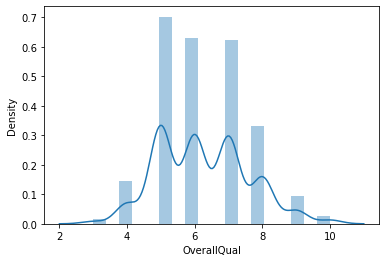

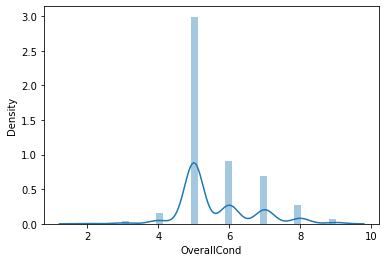

In [18]:
# Checking OverallQual & OverallCond column
data.OverallQual.value_counts()
sns.distplot(data.OverallQual)
plt.show()
sns.distplot(data.OverallCond)

# Quality and Condition data are given as int64 but they should be categorical
data.OverallQual = data.OverallQual.astype('object')
data.OverallCond = data.OverallCond.astype('object')

In [19]:
# Checking Bathroom related columns
print("BsmtFullBath:\n",data.BsmtFullBath.value_counts(),"\n")
print("BsmtHalfBath:\n",data.BsmtHalfBath.value_counts(),"\n")
print("FullBath:\n",data.FullBath.value_counts(),"\n")
print("HalfBath\n",data.HalfBath.value_counts(),"\n")

# We don't require any data preprocessing here for now. Will revisit these larer as required

BsmtFullBath:
 0    618
1    426
2      8
Name: BsmtFullBath, dtype: int64 

BsmtHalfBath:
 0    994
1     57
2      1
Name: BsmtHalfBath, dtype: int64 

FullBath:
 2    573
1    453
3     21
0      5
Name: FullBath, dtype: int64 

HalfBath
 0    658
1    387
2      7
Name: HalfBath, dtype: int64 



In [20]:
# Checking Bedroom and kitchen and rooms related columns
print("BedroomAbvGr:\n",data.BedroomAbvGr.value_counts(),"\n")
print("KitchenAbvGr:\n", data.KitchenAbvGr.value_counts(),"\n")
print("TotRmsAbvGrd:\n", data.TotRmsAbvGrd.value_counts(),"\n")
print("Fireplaces:\n", data.Fireplaces.value_counts(),"\n")
print("GarageCars:\n", data.GarageCars.value_counts(),"\n")

# We don't require any data preprocessing here for now. WIll revisit these larer as required

BedroomAbvGr:
 3    601
2    261
4    145
1     24
5     14
0      4
6      3
Name: BedroomAbvGr, dtype: int64 

KitchenAbvGr:
 1    1016
2      35
3       1
Name: KitchenAbvGr, dtype: int64 

TotRmsAbvGrd:
 6     310
7     234
5     199
8     144
4      56
9      53
10     33
11     13
12      6
3       4
Name: TotRmsAbvGrd, dtype: int64 

Fireplaces:
 1    491
0    487
2     71
3      3
Name: Fireplaces, dtype: int64 

GarageCars:
 2    605
1    285
3    158
4      4
Name: GarageCars, dtype: int64 



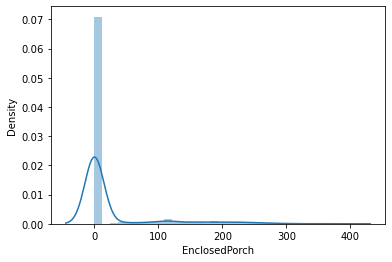

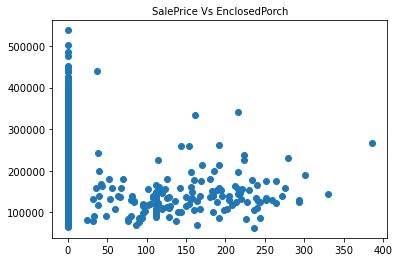

After Outlier Removal


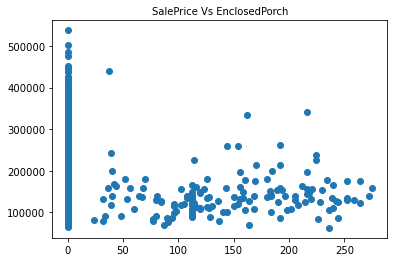

In [21]:
# Checking EnclosedPorch
data.EnclosedPorch.value_counts()

sns.distplot(data.EnclosedPorch)
plt.show()

#plt.figure(figsize=(50,50))
plt.scatter(data["EnclosedPorch"], data["SalePrice"])
plt.yticks(fontsize=10,)
plt.xticks(fontsize=10,)
plt.title("SalePrice Vs EnclosedPorch", fontsize=10)
plt.show()

# most of the values are 0; the price is slighly increasing with number

# There are few outhliers that we can remove as per the HQR
data = data.loc[(data['EnclosedPorch'] < data['EnclosedPorch'].quantile(0.995))]

print("After Outlier Removal")
plt.scatter(data["EnclosedPorch"], data["SalePrice"])
plt.yticks(fontsize=10,)
plt.xticks(fontsize=10,)
plt.title("SalePrice Vs EnclosedPorch", fontsize=10)
plt.show()

In [22]:
# Checking the data after initial preprocessing again
print(data.shape)
data.head()

# We still have suffient number of rows and 74 feature colunms

(1046, 75)


Id MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1         60       RL         65.0     8450   Pave      Reg         Lvl   
1   2         20       RL         80.0     9600   Pave      Reg         Lvl   
2   3         60       RL         68.0    11250   Pave      IR1         Lvl   
3   4         70       RL         60.0     9550   Pave      IR1         Lvl   
4   5         60       RL         84.0    14260   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0           7           5       2003          2003     Gable  CompShg   
1           6           8       1976          1976     Gable  CompShg   
2           7           5       2001          2002     Gable  CompShg   
3           7           5       1915          1970     Gable  CompShg   
4           8           5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd             7        Typ           1     Detchd       1998.0   

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1046 non-null   int64  
 1   MSSubClass     1046 non-null   object 
 2   MSZoning       1046 non-null   object 
 3   LotFrontage    1046 non-null   float64
 4   LotArea        1046 non-null   int64  
 5   Street         1046 non-null   object 
 6   LotShape       1046 non-null   object 
 7   LandContour    1046 non-null   object 
 8   LotConfig      1046 non-null   object 
 9   LandSlope      1046 non-null   object 
 10  Neighborhood   1046 non-null   object 
 11  Condition1     1046 non-null   object 
 12  Condition2     1046 non-null   object 
 13  BldgType       1046 non-null   object 
 14  HouseStyle     1046 non-null   object 
 15  OverallQual    1046 non-null   object 
 16  OverallCond    1046 non-null   object 
 17  YearBuilt      1046 non-null   int64  
 18  YearRemo

In [24]:
# We need to handle Dates(which are in years) in the dataset

date_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
date_data = data[date_cols]
print(date_data.describe())

# From the description below we might 2 separate binning functions to do binning of years into decades

def Build_decade_bin(val):
    if(val < 1900):
        return "before_1900"
    elif val<1920:
        return "1900_1920"
    elif val<1940:
        return "1920_1940"
    elif val<1960:
        return "1940_1960"
    elif val<1980:
        return "1960_1980"
    elif val<2000:
        return "1980_2000"
    else:
        return "2000_after"

data['YearBuilt'] = data['YearBuilt'].apply(lambda x : Build_decade_bin(x))
data['GarageYrBlt'] = data['GarageYrBlt'].apply(lambda x : Build_decade_bin(x))
data['YearRemodAdd'] = data['YearRemodAdd'].apply(lambda x : Build_decade_bin(x))
data['YrSold'] = data['YrSold'].astype('object')

# Here we have converted date in years into the categorical variables so than they can contribute efficiently in the model

         YearBuilt  YearRemodAdd  GarageYrBlt       YrSold
count  1046.000000   1046.000000  1046.000000  1046.000000
mean   1972.737094   1986.114723  1978.900574  2007.775335
std      31.115815     20.924568    25.906450     1.329173
min    1880.000000   1950.000000  1900.000000  2006.000000
25%    1953.000000   1967.000000  1960.000000  2007.000000
50%    1976.000000   1996.000000  1984.000000  2008.000000
75%    2003.000000   2005.000000  2003.000000  2009.000000
max    2010.000000   2010.000000  2010.000000  2010.000000


In [25]:
#Droping ID column as it is not important
data = data.drop(['Id'], axis =1) # As we dont need ID Column

#Separating numberic columns
num_cols = data.select_dtypes('number').columns
data_num = data[num_cols]
data_num.corr()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.414801    0.220324    0.116268    0.038554   
LotArea           0.414801  1.000000    0.150448    0.195383    0.045575   
MasVnrArea        0.220324  0.150448    1.000000    0.251648   -0.077365   
BsmtFinSF1        0.116268  0.195383    0.251648    1.000000   -0.066404   
BsmtFinSF2        0.038554  0.045575   -0.077365   -0.066404    1.000000   
BsmtUnfSF         0.145162  0.049812    0.107095   -0.599907   -0.243402   
TotalBsmtSF       0.328211  0.309132    0.391608    0.422487    0.057167   
1stFlrSF          0.363490  0.335614    0.367959    0.396535    0.052648   
2ndFlrSF          0.050749  0.121977    0.143769   -0.177288   -0.106965   
LowQualFinSF     -0.029797  0.013071   -0.063490   -0.072477    0.008466   
GrLivArea         0.311359  0.357941    0.394728    0.128780   -0.055750   
BsmtFullBath      0.048362  0.129611    0.108528    0.656207    0.157526   
BsmtHalfBath     -0.015234 -0.025894   -0.029963    0.056402    0.054820   
FullBath          0.151448  0.143949    0.279774    0.021089   -0.092564   
HalfBath          0.070851  0.107661    0.164812   -0.021753   -0.022352   
BedroomAbvGr      0.278411  0.193622    0.109733   -0.130909    0.012889   
KitchenAbvGr      0.015779 -0.008815   -0.001878   -0.024940   -0.040024   
TotRmsAbvGrd      0.318009  0.294688    0.304921    0.019621   -0.068274   
Fireplaces        0.201121  0.266564    0.236969    0.212271    0.001330   
GarageCars        0.267193  0.231255    0.395712    0.180411   -0.092650   
GarageArea        0.327185  0.267197    0.381811    0.232656   -0.061898   
WoodDeckSF        0.088288  0.235355    0.159103    0.200106    0.036829   
OpenPorchSF       0.125088  0.131083    0.119416    0.071882    0.015443   
EnclosedPorch    -0.023397 -0.056089   -0.125324   -0.115837    0.033644   
3SsnPorch         0.097224  0.028804    0.026348    0.029443   -0.030817   
ScreenPorch       0.044207  0.134907    0.054525    0.059299    0.062541   
PoolArea          0.021371  0.023230   -0.004178    0.026030    0.079098   
MiscVal           0.005943  0.029063   -0.054433    0.005210    0.015462   
MoSold            0.020336  0.035523    0.042153    0.008240   -0.041674   
SalePrice         0.315204  0.371910    0.487174    0.371052   -0.066150   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
LotFrontage     0.145162     0.328211  0.363490  0.050749     -0.029797   
LotArea         0.049812     0.309132  0.335614  0.121977      0.013071   
MasVnrArea      0.107095     0.391608  0.367959  0.143769     -0.063490   
BsmtFinSF1     -0.599907     0.422487  0.396535 -0.177288     -0.072477   
BsmtFinSF2     -0.243402     0.057167  0.052648 -0.106965      0.008466   
BsmtUnfSF       1.000000     0.397266  0.343099 -0.032258      0.004928   
TotalBsmtSF     0.397266     1.000000  0.902237 -0.293025     -0.075558   
1stFlrSF        0.343099     0.902237  1.000000 -0.268350     -0.020043   
2ndFlrSF       -0.032258    -0.293025 -0.268350  1.000000      0.049008   
LowQualFinSF    0.004928    -0.075558 -0.020043  0.049008      1.000000   
GrLivArea       0.225237     0.399068  0.498078  0.697601      0.114450   
BsmtFullBath   -0.478912     0.260633  0.234918 -0.167578     -0.033180   
BsmtHalfBath   -0.116481    -0.050754 -0.025995 -0.050947     -0.026037   
FullBath        0.311475     0.360815  0.362257  0.392881     -0.025372   
HalfBath       -0.085680    -0.138492 -0.153575  0.609491     -0.001431   
BedroomAbvGr    0.125961     0.003704  0.066247  0.503761      0.076565   
KitchenAbvGr    0.059914     0.025817  0.059159  0.084739     -0.020387   
TotRmsAbvGrd    0.218756     0.257658  0.351500  0.632182      0.106971   
Fireplaces      0.033283     0.290060  0.362351  0.194264      0.016474   
GarageCars      0.267622     0.495023  0.457112  0.170801     -0.028598   
GarageArea      0.223312     0.516125  0.487475  0.096119     -0.009306   
WoodDeck

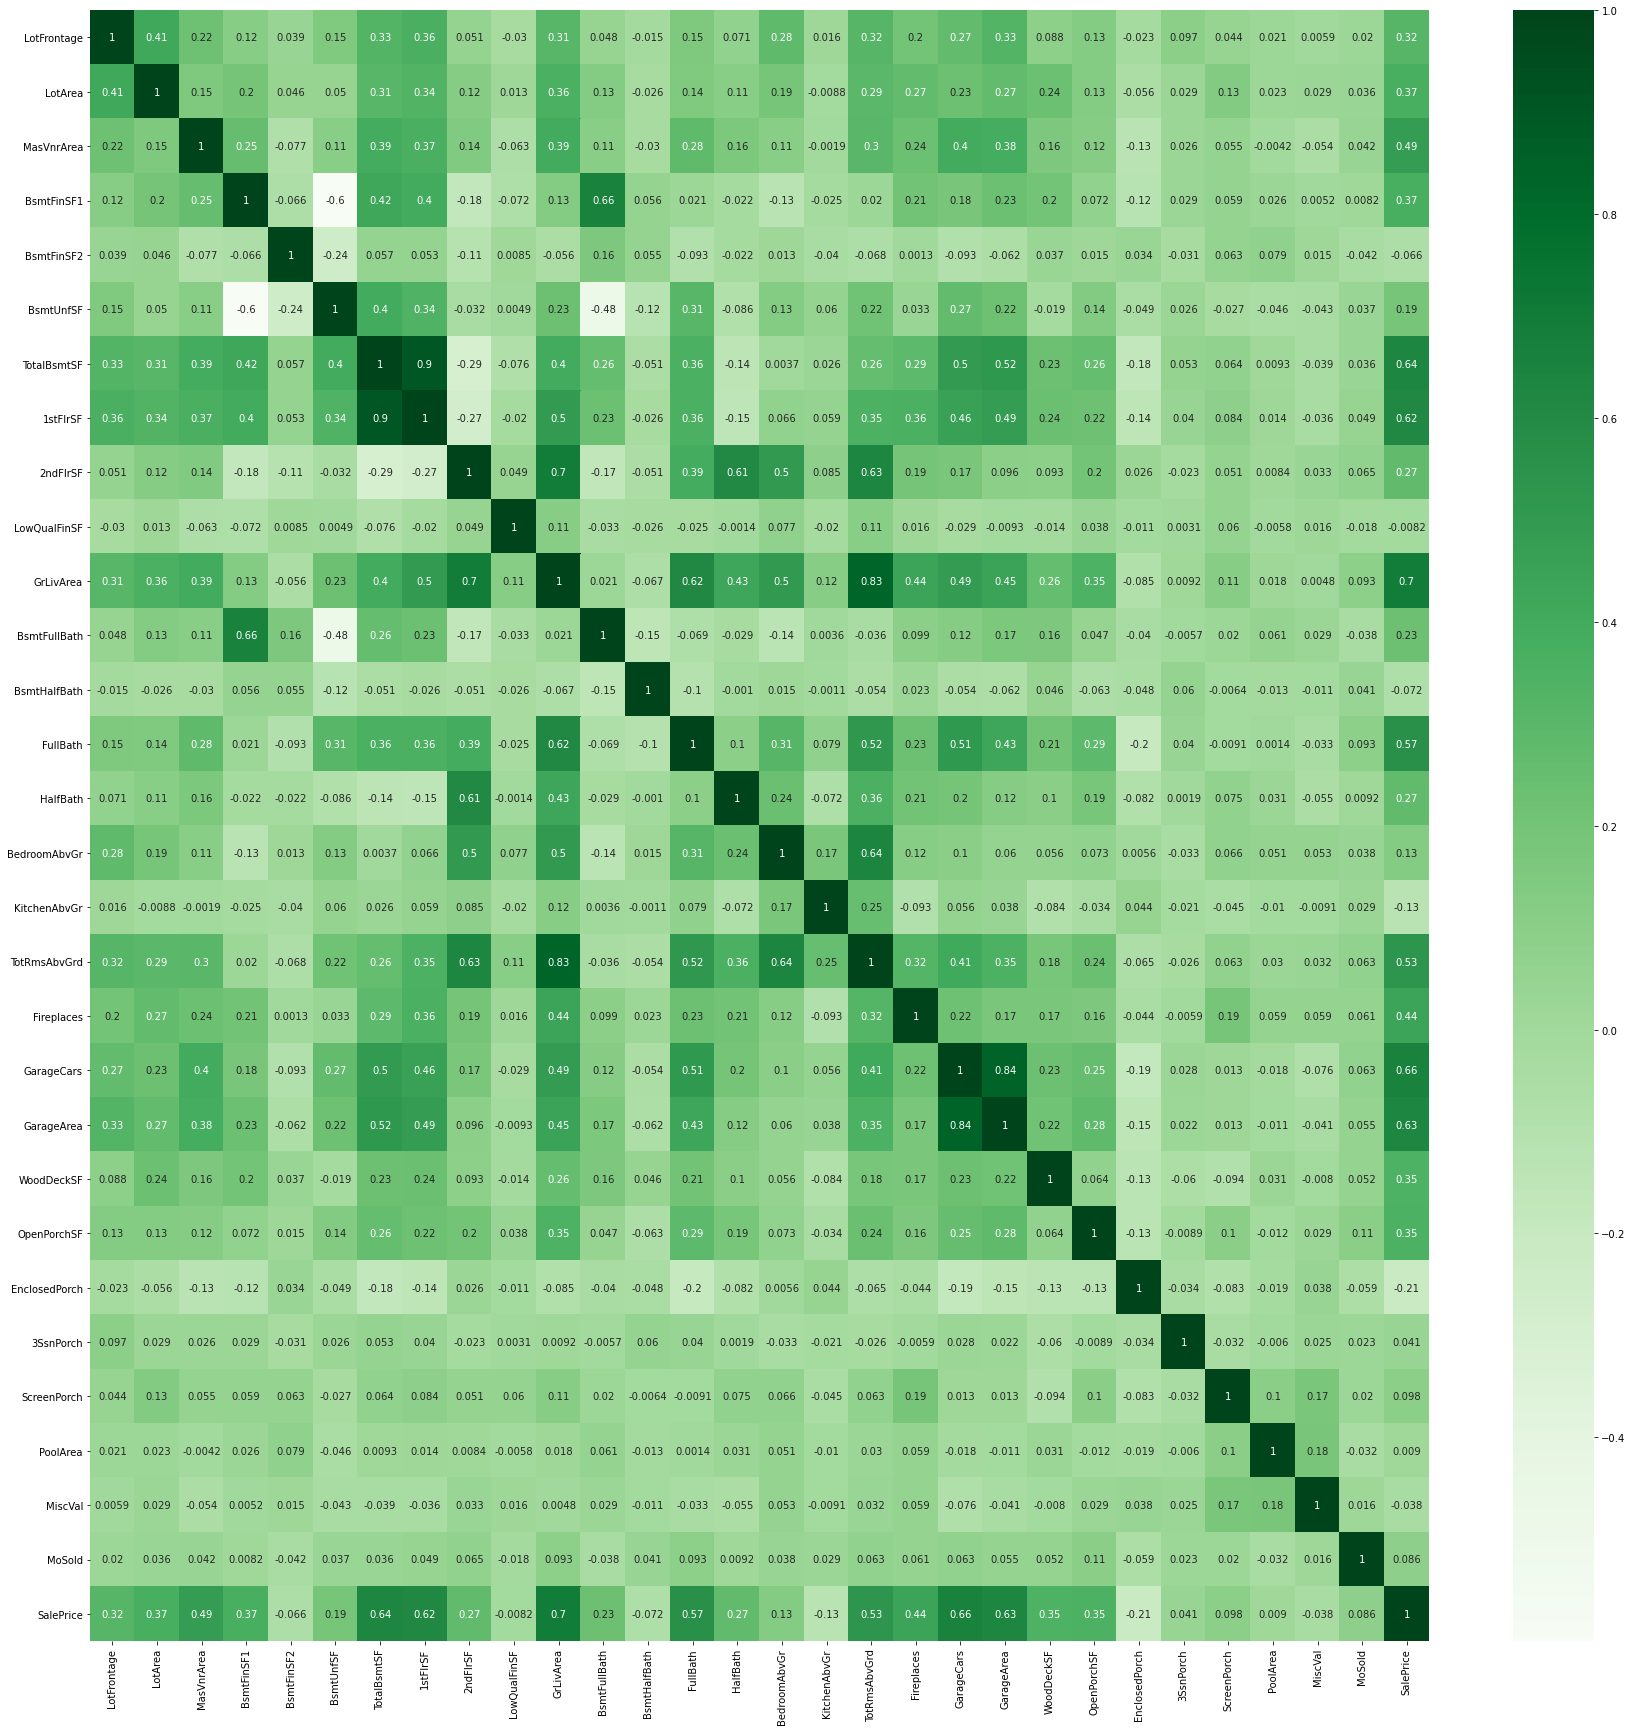

In [26]:
#Plotting heatmap for numeric data
plt.figure(figsize=(30,30))
sns.heatmap(data= data_num.corr(), cmap="Greens", annot=True)
plt.show()

We can see that there are many numerical variables which have high correlation with the SalePrice. <br> 
Few features are also highly correlated with the each other hence we have to take care of multi-collinearity.

### Plotting charts of both numerical and categorical features

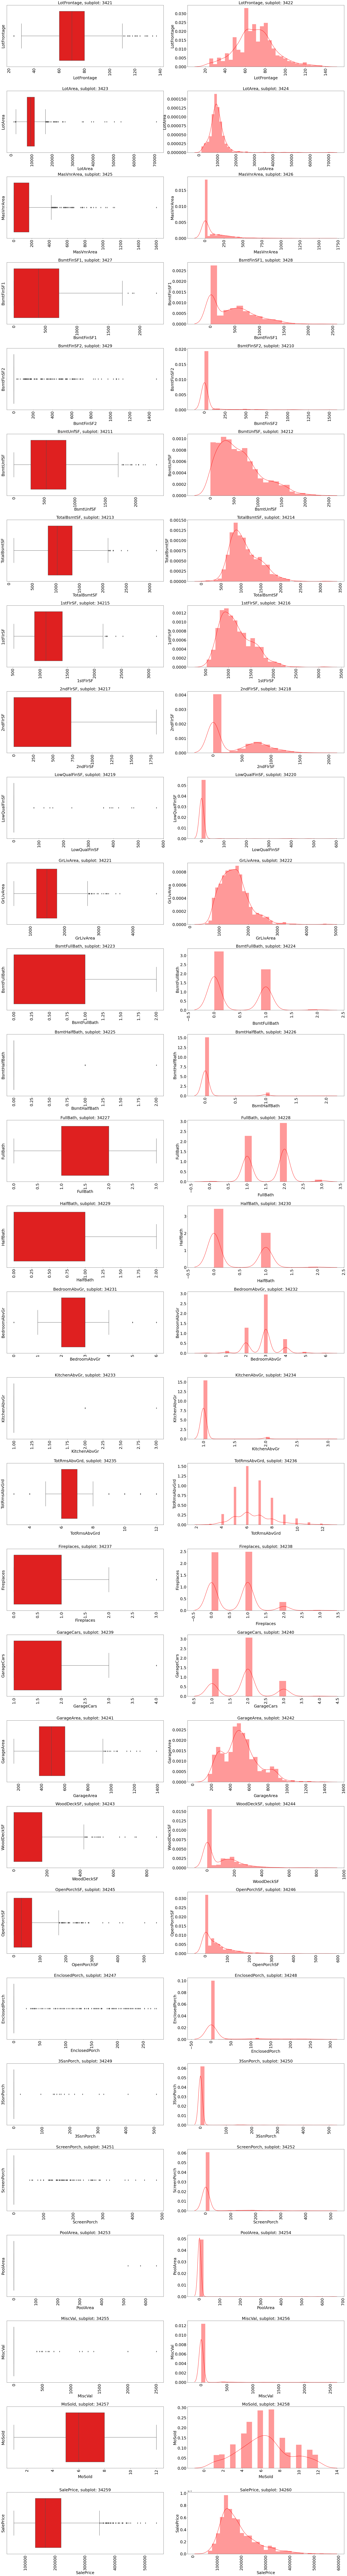

In [27]:
#Plotting separate graphs for all nuerical variables to check distribution
a=34
b=2
c=1

num_cols = data_num.columns

fig = plt.figure(figsize=(40,100))
fig.set_size_inches(30,250)

for i in num_cols:
    plt.subplot(a,b,c)
    plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=25)
    plt.xlabel(i,fontsize=25)
    plt.ylabel(i,fontsize=25)
    plt.xticks(fontsize=25,rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=25)
    sns.boxplot(data_num[i], color='r')
    c=c+1
    plt.subplot(a,b,c)
    plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=25)
    plt.xlabel(i,fontsize=25)
    plt.ylabel(i,fontsize=25)
    plt.xticks(fontsize=25,rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=25)
    sns.distplot(data_num[i],color = 'r') #check the estimator 'mean' here by default
    c = c+1
fig.tight_layout()
plt.show();

In [28]:
#Separating categorical columns
cat_cols = data.select_dtypes('object').columns
data_cat = data[cat_cols]

print(len(cat_cols))
print(cat_cols)

44
Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')


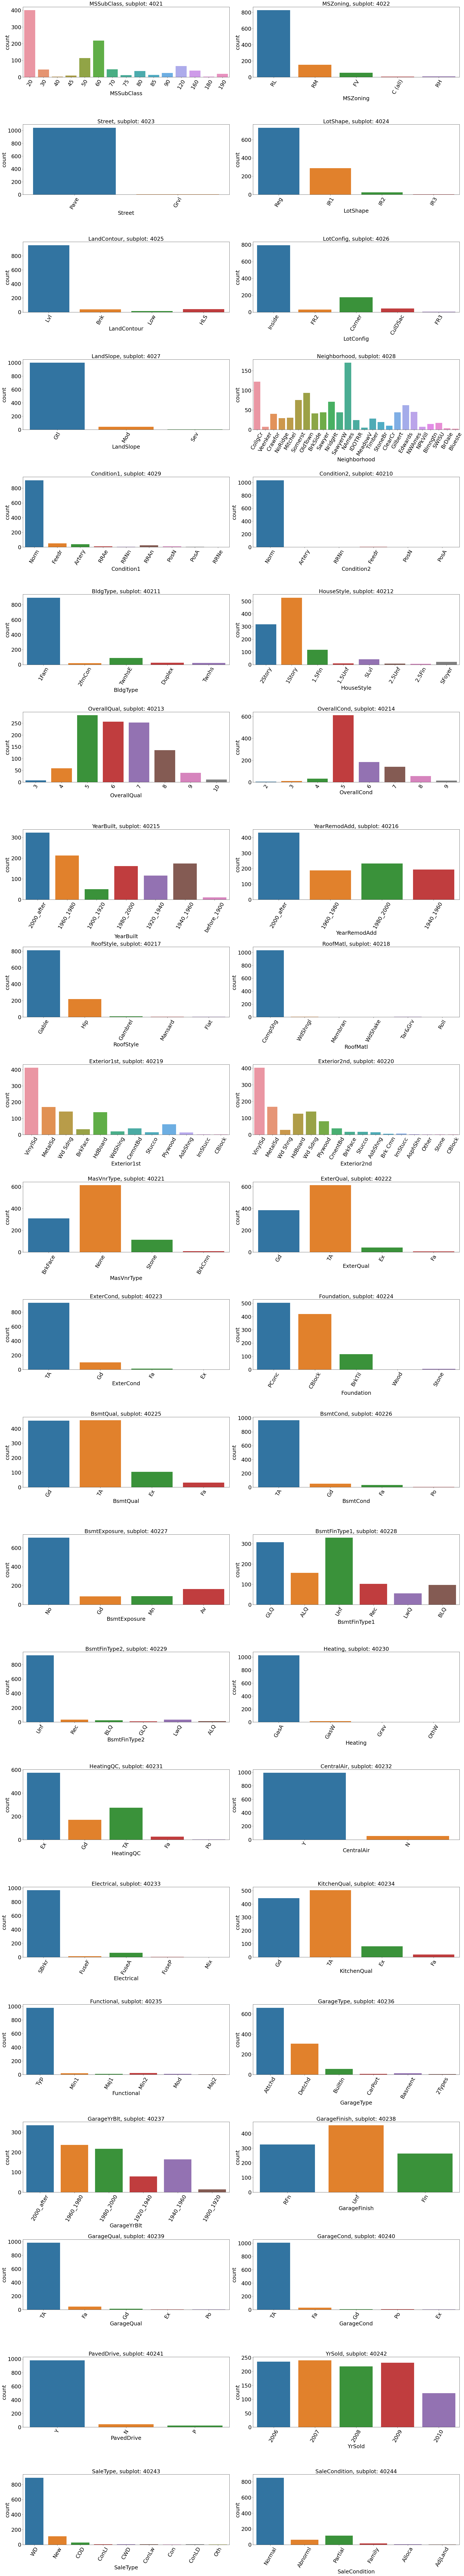

In [29]:
#Plotting all the categorical data to check the distributions

a = 40
b = 2
c = 1

fig = plt.figure(figsize=(30,50))
fig.set_size_inches(30,300)

for i in cat_cols:
    plt.subplot(a,b,c)
    plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=25)
    plt.xlabel(i,fontsize=25)
    plt.ylabel(i,fontsize=25)
    plt.xticks(fontsize=10,rotation=60)
    plt.tick_params(axis='both', which='major', labelsize=25)
    sns.countplot(data_cat[i]) #check the estimator 'mean' here by default
    c = c+1

fig.tight_layout()
plt.show();

As from the above graphs we can observe that many of the feature has high class imbalance. <br>
We won't be handling this here as we will be creating dummy variables for the categories and then will select features from the newly created features and encoding.

# Feature Engineering And Selection (For Approach 1)

#### Steps
- Convert Categorical Varialbes to Numerical (Encoding)
- Using binning convert Date-year var to Numerical (Already done above)
- Using correlation with SalePrice select few most correlating vars
- Using RFE for further feature selection
- Use p-value and VIF to select final feature Set

In [30]:
# Encoding all the categorical variables using dummy_variables
data_cat = pd.get_dummies(data_cat, drop_first = True)
data_cat.shape

(1046, 228)

In [31]:
# Merging all the encoded cat and numerical data together
data_total = pd.concat([data_num,data_cat], axis = 1)
data_total.shape

(1046, 258)

In [32]:
# Finding correlation between all the variables wrt SalePrice
correlation_df = pd.DataFrame(data_total.corr()['SalePrice']).reset_index()
correlation_df.set_index(['index'], inplace = True)

#Selection Features with the more positive or negative correlations with SalePrice
correlation_df = correlation_df.loc[(correlation_df.SalePrice > 0.15) | (correlation_df.SalePrice < -0.15)]
features = list(correlation_df.index)
print(features)

print("Total correlated features: ",len(features))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice', 'MSSubClass_30', 'MSSubClass_50', 'MSSubClass_60', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_Reg', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_2Story', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'YearBuilt_1920_1940', 'YearBuilt_1940_1960', 'YearBuilt_1960_1980', 'YearBuilt_1980_2000', 'YearBuilt_2000_after', 'YearRemodAdd_1960_1980', 'YearRemodAdd_2000_after', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_CemntB

In [33]:
# For further processing we will consider the above features only for further analysis
# We will pull above feature data into new dataframe sales_Data

sales_Data = data_total[features]
sales_Data.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         65.0     8450       196.0         706        150          856   
1         80.0     9600         0.0         978        284         1262   
2         68.0    11250       162.0         486        434          920   
3         60.0     9550         0.0         216        540          756   
4         84.0    14260       350.0         655        490         1145   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0       856       854       1710             1         2         1   
1      1262         0       1262             0         2         0   
2       920       866       1786             1         2         1   
3       961       756       1717             1         1         0   
4      1145      1053       2198             1         2         1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2         548           0           61   
1             6           1           2         460         298            0   
2             6           1           2         608           0           42   
3             7           1           3         642           0           35   
4             9           1           3         836         192           84   

   EnclosedPorch  SalePrice  MSSubClass_30  MSSubClass_50  MSSubClass_60  \
0              0     208500              0              0              1   
1              0     181500              0              0              0   
2              0     223500              0              0              1   
3            272     140000              0              0              0   
4              0     250000              0              0              1   

   MSZoning_RL  MSZoning_RM  LotShape_Reg  LotConfig_CulDSac  \
0            1            0             1                  0   
1            1            0             1                  0   
2            1            0             0                  0   
3            1            0             0                  0   
4            1            0             0                  0   

   Neighborhood_Edwards  Neighborhood_IDOTRR  Neighborhood_NAmes  \
0                     0                    0                   0   
1                     0                    0                   0   
2                     0                    0                   0   
3                     0                    0                   0   
4                     0                    0                   0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     1                     0                     0   

   Neighborhood_Somerst  Neighborhood_StoneBr  HouseStyle_2Story  \
0                     0                     0                  1   
1                     0                     0                  0   
2                     0                     0                  1   
3                     0                     0                  1   
4                     0                     0                  1   

   OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  OverallQual_8  \
0              0              0              0              1              0   
1              0              0              1              0              0   
2              0              0              0              1              0   
3              0              0              0              1              0   
4              0              0              0              0              1   

   OverallQual_9  OverallQual_10  OverallCond_5  OverallCond_6  OverallCond_7  \
0

# Data Holding for model building 

In [34]:
from sklearn.model_selection import train_test_split

y = sales_Data['SalePrice']
X = sales_Data.drop(['SalePrice'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(732, 100)
(732,)
(314, 100)
(314,)


### We need to scale few features

In [35]:
# Normalization and Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
1307         60.0     8072         0.0         746        244          990   
97           73.0    10921        48.0         520        440          960   
303          70.0     9800         0.0         894          0          894   
1415         51.0     3635       130.0         988        398         1386   
374          65.0     8200         0.0           0        847          847   

      1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
1307       990         0        990             1         1         0   
97         960         0        960             1         1         0   
303        894         0        894             1         1         0   
1415      1569         0       1569             0         2         0   
374        847      1081       1928             0         2         1   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
1307             5           0           2         480           0   
97               6           0           1         432         120   
303              5           0           2         552         256   
1415             7           1           3         660         143   
374              8           1           2         434         100   

      OpenPorchSF  EnclosedPorch  MSSubClass_30  MSSubClass_50  MSSubClass_60  \
1307           64              0              0              0              0   
97              0              0              0              0              0   
303             0              0              0              0              0   
1415           20              0              0              0              0   
374            48              0              0              0              1   

      MSZoning_RL  MSZoning_RM  LotShape_Reg  LotConfig_CulDSac  \
1307            1            0             1                  0   
97              1            0             1                  0   
303             1            0             1                  0   
1415            1            0             1                  0   
374             1            0             1                  0   

      Neighborhood_Edwards  Neighborhood_IDOTRR  Neighborhood_NAmes  \
1307                     0                    0                   0   
97                       1                    0                   0   
303                      0                    0                   0   
1415                     0                    0                   0   
374                      0                    0                   0   

      Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
1307                     0                     0                     0   
97                       0                     0                     0   
303                      0                     0                     0   
1415                     0                     0                     0   
374                      0                     0                     0   

      Neighborhood_Somerst  Neighborhood_StoneBr  HouseStyle_2Story  \
1307                     0                     0                  0   
97                       0                     0                  0   
303                      0                     0                  0   
1415                     0                     0                  0   
374                      0                     0                  1   

      OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  \
1307              0              1              0              0   
97                1              0              0              0   
303               0              1              0              0   
1415              0              0              0              1   
374               0              0              0              1   

      OverallQual_8  OverallQual_9  OverallQual_10  OverallCond_5  \
1307      

In [36]:
col_scale_list = ['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF','BsmtFinSF1',
                  'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea',
                  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'BsmtFullBath', 'FullBath', 
                  'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

for i in col_scale_list:
    X_train[i] = scaler.fit_transform(X_train[[i]])
    X_test[i] = scaler.transform(X_test[[i]])

X_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
1307     0.318584  0.088968     0.00000    0.330088   0.104452     0.252610   
97       0.433628  0.130372     0.03000    0.230088   0.188356     0.242171   
303      0.407080  0.114081     0.00000    0.395575   0.000000     0.219207   
1415     0.238938  0.024487     0.08125    0.437168   0.170377     0.390397   
374      0.362832  0.090829     0.00000    0.000000   0.362586     0.202853   

      1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
1307  0.179526  0.000000   0.092118           0.5  0.333333       0.0   
97    0.168067  0.000000   0.084729           0.5  0.333333       0.0   
303   0.142857  0.000000   0.068473           0.5  0.333333       0.0   
1415  0.400688  0.000000   0.234729           0.0  0.666667       0.0   
374   0.124905  0.594609   0.323153           0.0  0.666667       0.5   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
1307      0.222222    0.000000    0.333333    0.260163    0.000000   
97        0.333333    0.000000    0.000000    0.221138    0.140023   
303       0.222222    0.000000    0.333333    0.318699    0.298716   
1415      0.444444    0.333333    0.666667    0.406504    0.166861   
374       0.555556    0.333333    0.333333    0.222764    0.116686   

      OpenPorchSF  EnclosedPorch  MSSubClass_30  MSSubClass_50  MSSubClass_60  \
1307     0.127490            0.0              0              0              0   
97       0.000000            0.0              0              0              0   
303      0.000000            0.0              0              0              0   
1415     0.039841            0.0              0              0              0   
374      0.095618            0.0              0              0              1   

      MSZoning_RL  MSZoning_RM  LotShape_Reg  LotConfig_CulDSac  \
1307            1            0             1                  0   
97              1            0             1                  0   
303             1            0             1                  0   
1415            1            0             1                  0   
374             1            0             1                  0   

      Neighborhood_Edwards  Neighborhood_IDOTRR  Neighborhood_NAmes  \
1307                     0                    0                   0   
97                       1                    0                   0   
303                      0                    0                   0   
1415                     0                    0                   0   
374                      0                    0                   0   

      Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
1307                     0                     0                     0   
97                       0                     0                     0   
303                      0                     0                     0   
1415                     0                     0                     0   
374                      0                     0                     0   

      Neighborhood_Somerst  Neighborhood_StoneBr  HouseStyle_2Story  \
1307                     0                     0                  0   
97                       0                     0                  0   
303                      0                     0                  0   
1415                     0                     0                  0   
374                      0                     0                  1   

      OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  \
1307              0              1              0              0   
97                1              0              0              0   
303               0              1              0              0   
1415              0              0              0              1   
374               0              0              0              1   

      OverallQual_8  OverallQual_9  OverallQual_10  OverallCond_5  \
1307

### Building a Initial MLR model

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error


y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
# Evaluation Metric on the training data
print("On Training Data: ")
print("R2 score Training",lm.score(X_train,y_train))
print("MAE Score",mean_absolute_error(y_train,y_pred_train))
print("MSE Score",mean_squared_error(y_train,y_pred_train))
print("MSLE Score",mean_squared_log_error(y_train,y_pred_train))

print("\n On Testing Data: ")
# Evaluation Metric on the testing data
print("R2 score Training",lm.score(X_test,y_test))
print("MAE Score",mean_absolute_error(y_test,y_pred_test))
print("MSE Score",mean_squared_error(y_test,y_pred_test))
print("MSLE Score",mean_squared_log_error(y_test,y_pred_test))

On Training Data: 
R2 score Training 0.8977532234196453
MAE Score 15522.958001631874
MSE Score 579296966.1085242
MSLE Score 0.01531627324808557

 On Testing Data: 
R2 score Training 0.8753724794495032
MAE Score 17645.33430896538
MSE Score 635194008.5963347
MSLE Score 0.019304458236045104


In [39]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     55.40
Date:                Mon, 23 Aug 2021   Prob (F-statistic):          3.37e-254
Time:                        15:48:14   Log-Likelihood:                -8423.6
No. Observations:                 732   AIC:                         1.705e+04
Df Residuals:                     631   BIC:                         1.751e+04
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

From the above we can observe many variables are irrelevant as the p-values are much higher.


##### Hence we will do manual feature selection using RFE first and then VIF or P-value method.

In [40]:
# There are many features with high p-value, hence we need to select few features which are useful and need to eliminate others

from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=50,verbose=True)
rfe = rfe.fit(X_train,y_train)

print(rfe.support_)
print(rfe.ranking_)

selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Support':rfe.support_,
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

features = list(selected_rfe_features[selected_rfe_features.Support == True].Feature)
print(features)

X_train = X_train[features]

Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 f

In [41]:
# Now we will check the VIF factor for the remaining features

#We will check VIF values for the  features and narrow down to more relevant features

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
8               GrLivArea  691.40
6                1stFlrSF  405.19
7                2ndFlrSF  200.76
49  SaleCondition_Partial   83.85
47           SaleType_New   81.73
5             TotalBsmtSF   78.85
37        MasVnrType_None   66.63
31    Exterior1st_VinylSd   54.39
34    Exterior2nd_VinylSd   52.67
30    Exterior1st_CemntBd   41.16
33    Exterior2nd_CmentBd   40.09
22          OverallQual_5   39.10
24          OverallQual_7   37.67
36     MasVnrType_BrkFace   36.66
23          OverallQual_6   34.34
40           ExterQual_TA   32.22
4               BsmtUnfSF   28.04
46           CentralAir_Y   21.87
25          OverallQual_8   21.13
3              BsmtFinSF1   20.82
12             GarageArea   19.49
39           ExterQual_Gd   17.65
38       MasVnrType_Stone   14.16
43            BsmtQual_TA   13.45
11             GarageCars   12.70
48   SaleCondition_Normal   11.63
0             LotFrontage   10.82
42            BsmtQual_Gd    9.61
21          OverallQual_4    8.23
26          OverallQual_9    6.79
1                 LotArea    6.29
32    Exterior1st_Wd Sdng    5.30
35    Exterior2nd_Wd Sdng    5.21
28          OverallCond_5    4.90
27         OverallQual_10    3.76
2              MasVnrArea    3.41
10             Fireplaces    3.09
9                HalfBath    3.09
45       BsmtFinType1_GLQ    2.93
13             WoodDeckSF    2.09
18   Neighborhood_NridgHt    2.06
41            BsmtQual_Fa    1.95
19   Neighborhood_OldTown    1.60
29          OverallCond_7    1.58
44        BsmtExposure_Gd    1.43
17   Neighborhood_NoRidge    1.39
20   Neighborhood_StoneBr    1.29
14      LotConfig_CulDSac    1.29
15   Neighborhood_Edwards    1.24
16    Neighborhood_IDOTRR    1.20

In [42]:
# Many Variables have VIF much more than 10
# We will remove one var at a time and again check the VIF recurccively

X_train = X_train.drop(['GrLivArea'], axis =1)

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
48  SaleCondition_Partial  83.85
46           SaleType_New  81.73
5             TotalBsmtSF  78.64
36        MasVnrType_None  66.33
30    Exterior1st_VinylSd  54.37
33    Exterior2nd_VinylSd  52.63
29    Exterior1st_CemntBd  41.15
32    Exterior2nd_CmentBd  40.06
21          OverallQual_5  38.46
23          OverallQual_7  37.08
35     MasVnrType_BrkFace  36.45
22          OverallQual_6  33.75
39           ExterQual_TA  32.20
6                1stFlrSF  29.60
4               BsmtUnfSF  28.01
45           CentralAir_Y  21.84
24          OverallQual_8  20.85
3              BsmtFinSF1  20.77
11             GarageArea  19.49
38           ExterQual_Gd  17.59
37       MasVnrType_Stone  14.08
42            BsmtQual_TA  13.45
10             GarageCars  12.68
47   SaleCondition_Normal  11.63
0             LotFrontage  10.76
41            BsmtQual_Gd   9.60
20          OverallQual_4   8.07
25          OverallQual_9   6.75
1                 LotArea   6.28
31    Exterior1st_Wd Sdng   5.26
34    Exterior2nd_Wd Sdng   5.21
27          OverallCond_5   4.90
7                2ndFlrSF   4.49
26         OverallQual_10   3.76
2              MasVnrArea   3.41
8                HalfBath   3.09
9              Fireplaces   3.08
44       BsmtFinType1_GLQ   2.92
12             WoodDeckSF   2.08
17   Neighborhood_NridgHt   2.06
40            BsmtQual_Fa   1.95
18   Neighborhood_OldTown   1.60
28          OverallCond_7   1.58
43        BsmtExposure_Gd   1.43
16   Neighborhood_NoRidge   1.39
19   Neighborhood_StoneBr   1.29
13      LotConfig_CulDSac   1.28
14   Neighborhood_Edwards   1.24
15    Neighborhood_IDOTRR   1.20

In [43]:
#Removing TotalBsmtSF as it has highest VIF

X_train = X_train.drop(['SaleCondition_Partial'], axis =1)

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5            TotalBsmtSF  78.64
36       MasVnrType_None  66.33
30   Exterior1st_VinylSd  54.37
33   Exterior2nd_VinylSd  52.63
29   Exterior1st_CemntBd  41.15
32   Exterior2nd_CmentBd  40.06
21         OverallQual_5  38.44
23         OverallQual_7  37.06
35    MasVnrType_BrkFace  36.45
22         OverallQual_6  33.73
39          ExterQual_TA  32.19
6               1stFlrSF  29.60
4              BsmtUnfSF  28.01
45          CentralAir_Y  21.84
24         OverallQual_8  20.81
3             BsmtFinSF1  20.77
11            GarageArea  19.48
38          ExterQual_Gd  17.59
37      MasVnrType_Stone  14.06
42           BsmtQual_TA  13.45
10            GarageCars  12.68
47  SaleCondition_Normal  11.47
0            LotFrontage  10.75
41           BsmtQual_Gd   9.60
20         OverallQual_4   8.07
25         OverallQual_9   6.74
1                LotArea   6.27
31   Exterior1st_Wd Sdng   5.26
34   Exterior2nd_Wd Sdng   5.21
27         OverallCond_5   4.90
7               2ndFlrSF   4.49
26        OverallQual_10   3.76
2             MasVnrArea   3.41
8               HalfBath   3.08
9             Fireplaces   3.08
46          SaleType_New   3.03
44      BsmtFinType1_GLQ   2.92
12            WoodDeckSF   2.08
17  Neighborhood_NridgHt   2.06
40           BsmtQual_Fa   1.95
18  Neighborhood_OldTown   1.59
28         OverallCond_7   1.58
43       BsmtExposure_Gd   1.43
16  Neighborhood_NoRidge   1.39
19  Neighborhood_StoneBr   1.29
13     LotConfig_CulDSac   1.28
14  Neighborhood_Edwards   1.24
15   Neighborhood_IDOTRR   1.20

In [44]:
#Removing SaleCondition_Partial as it has highest VIF

X_train = X_train.drop(['TotalBsmtSF'], axis =1)

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
35       MasVnrType_None  66.15
29   Exterior1st_VinylSd  54.02
32   Exterior2nd_VinylSd  52.33
28   Exterior1st_CemntBd  41.14
31   Exterior2nd_CmentBd  40.05
20         OverallQual_5  38.39
22         OverallQual_7  37.00
34    MasVnrType_BrkFace  36.44
21         OverallQual_6  33.69
38          ExterQual_TA  31.97
44          CentralAir_Y  21.80
23         OverallQual_8  20.76
5               1stFlrSF  19.78
10            GarageArea  19.48
37          ExterQual_Gd  17.57
4              BsmtUnfSF  16.79
36      MasVnrType_Stone  14.05
41           BsmtQual_TA  13.44
3             BsmtFinSF1  12.75
9             GarageCars  12.68
46  SaleCondition_Normal  11.46
0            LotFrontage  10.75
40           BsmtQual_Gd   9.57
19         OverallQual_4   8.07
24         OverallQual_9   6.72
1                LotArea   6.27
30   Exterior1st_Wd Sdng   5.23
33   Exterior2nd_Wd Sdng   5.18
26         OverallCond_5   4.87
6               2ndFlrSF   4.35
25        OverallQual_10   3.75
2             MasVnrArea   3.40
7               HalfBath   3.08
8             Fireplaces   3.06
45          SaleType_New   3.03
43      BsmtFinType1_GLQ   2.89
11            WoodDeckSF   2.08
16  Neighborhood_NridgHt   2.06
39           BsmtQual_Fa   1.94
17  Neighborhood_OldTown   1.59
27         OverallCond_7   1.58
42       BsmtExposure_Gd   1.42
15  Neighborhood_NoRidge   1.38
18  Neighborhood_StoneBr   1.29
12     LotConfig_CulDSac   1.28
13  Neighborhood_Edwards   1.24
14   Neighborhood_IDOTRR   1.20

In [45]:
#Removing more feature as it has higher VIF
#Please note that this varoables are selected based on the recurssive approach and not removed at once

X_train = X_train.drop(['MasVnrType_None'], axis =1)

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
29   Exterior1st_VinylSd  54.02
32   Exterior2nd_VinylSd  52.32
28   Exterior1st_CemntBd  41.11
31   Exterior2nd_CmentBd  40.02
37          ExterQual_TA  30.66
20         OverallQual_5  24.68
22         OverallQual_7  24.19
21         OverallQual_6  22.05
43          CentralAir_Y  21.69
5               1stFlrSF  19.59
10            GarageArea  19.48
36          ExterQual_Gd  17.13
4              BsmtUnfSF  16.27
23         OverallQual_8  14.04
40           BsmtQual_TA  13.30
9             GarageCars  12.67
3             BsmtFinSF1  12.46
45  SaleCondition_Normal  11.30
0            LotFrontage  10.69
39           BsmtQual_Gd   9.46
1                LotArea   6.27
19         OverallQual_4   5.74
30   Exterior1st_Wd Sdng   5.23
33   Exterior2nd_Wd Sdng   5.17
26         OverallCond_5   4.85
24         OverallQual_9   4.57
6               2ndFlrSF   4.33
2             MasVnrArea   3.34
34    MasVnrType_BrkFace   3.13
7               HalfBath   3.07
8             Fireplaces   3.05
44          SaleType_New   2.98
42      BsmtFinType1_GLQ   2.89
25        OverallQual_10   2.79
35      MasVnrType_Stone   2.09
11            WoodDeckSF   2.08
16  Neighborhood_NridgHt   2.05
38           BsmtQual_Fa   1.93
27         OverallCond_7   1.58
17  Neighborhood_OldTown   1.57
41       BsmtExposure_Gd   1.41
15  Neighborhood_NoRidge   1.38
18  Neighborhood_StoneBr   1.29
12     LotConfig_CulDSac   1.28
13  Neighborhood_Edwards   1.23
14   Neighborhood_IDOTRR   1.17

In [46]:
X_train = X_train.drop(['Exterior1st_VinylSd'], axis =1)

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
28   Exterior1st_CemntBd  41.11
30   Exterior2nd_CmentBd  40.02
36          ExterQual_TA  30.66
20         OverallQual_5  24.67
22         OverallQual_7  24.19
21         OverallQual_6  22.05
42          CentralAir_Y  21.69
5               1stFlrSF  19.58
10            GarageArea  19.40
35          ExterQual_Gd  17.11
4              BsmtUnfSF  16.26
23         OverallQual_8  14.03
39           BsmtQual_TA  13.30
9             GarageCars  12.65
3             BsmtFinSF1  12.45
44  SaleCondition_Normal  11.30
0            LotFrontage  10.67
38           BsmtQual_Gd   9.45
1                LotArea   6.26
19         OverallQual_4   5.73
29   Exterior1st_Wd Sdng   5.06
32   Exterior2nd_Wd Sdng   5.02
26         OverallCond_5   4.85
24         OverallQual_9   4.56
6               2ndFlrSF   4.31
2             MasVnrArea   3.34
33    MasVnrType_BrkFace   3.13
31   Exterior2nd_VinylSd   3.11
7               HalfBath   3.07
8             Fireplaces   3.03
43          SaleType_New   2.98
41      BsmtFinType1_GLQ   2.89
25        OverallQual_10   2.79
11            WoodDeckSF   2.08
34      MasVnrType_Stone   2.06
16  Neighborhood_NridgHt   1.97
37           BsmtQual_Fa   1.93
27         OverallCond_7   1.58
17  Neighborhood_OldTown   1.56
40       BsmtExposure_Gd   1.41
15  Neighborhood_NoRidge   1.38
18  Neighborhood_StoneBr   1.29
12     LotConfig_CulDSac   1.28
13  Neighborhood_Edwards   1.23
14   Neighborhood_IDOTRR   1.17

In [47]:
X_train = X_train.drop(['Exterior1st_CemntBd'], axis =1)

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
35          ExterQual_TA  28.88
20         OverallQual_5  24.58
22         OverallQual_7  24.13
21         OverallQual_6  21.95
41          CentralAir_Y  21.62
5               1stFlrSF  19.58
10            GarageArea  19.40
4              BsmtUnfSF  16.26
34          ExterQual_Gd  16.11
23         OverallQual_8  13.98
38           BsmtQual_TA  13.18
9             GarageCars  12.64
3             BsmtFinSF1  12.44
43  SaleCondition_Normal  11.30
0            LotFrontage  10.47
37           BsmtQual_Gd   9.34
1                LotArea   5.73
19         OverallQual_4   5.72
28   Exterior1st_Wd Sdng   5.05
31   Exterior2nd_Wd Sdng   5.02
26         OverallCond_5   4.84
24         OverallQual_9   4.55
6               2ndFlrSF   4.23
2             MasVnrArea   3.34
32    MasVnrType_BrkFace   3.12
30   Exterior2nd_VinylSd   3.11
7               HalfBath   3.05
8             Fireplaces   3.01
42          SaleType_New   2.98
40      BsmtFinType1_GLQ   2.88
25        OverallQual_10   2.77
11            WoodDeckSF   2.07
33      MasVnrType_Stone   2.06
16  Neighborhood_NridgHt   1.96
36           BsmtQual_Fa   1.92
27         OverallCond_7   1.58
17  Neighborhood_OldTown   1.56
29   Exterior2nd_CmentBd   1.47
39       BsmtExposure_Gd   1.41
15  Neighborhood_NoRidge   1.38
12     LotConfig_CulDSac   1.28
13  Neighborhood_Edwards   1.23
18  Neighborhood_StoneBr   1.19
14   Neighborhood_IDOTRR   1.17

In [48]:
X_train = X_train.drop(['ExterQual_TA'], axis =1)

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
40          CentralAir_Y  21.36
22         OverallQual_7  19.75
5               1stFlrSF  19.56
10            GarageArea  19.40
20         OverallQual_5  18.51
21         OverallQual_6  16.70
4              BsmtUnfSF  16.23
9             GarageCars  12.62
37           BsmtQual_TA  12.54
3             BsmtFinSF1  12.37
23         OverallQual_8  11.90
42  SaleCondition_Normal  11.28
0            LotFrontage  10.47
36           BsmtQual_Gd   9.00
1                LotArea   5.73
28   Exterior1st_Wd Sdng   5.04
31   Exterior2nd_Wd Sdng   5.01
26         OverallCond_5   4.83
19         OverallQual_4   4.68
24         OverallQual_9   4.37
6               2ndFlrSF   4.23
34          ExterQual_Gd   3.93
2             MasVnrArea   3.31
32    MasVnrType_BrkFace   3.12
30   Exterior2nd_VinylSd   3.10
7               HalfBath   3.05
8             Fireplaces   3.01
41          SaleType_New   2.95
39      BsmtFinType1_GLQ   2.87
25        OverallQual_10   2.77
11            WoodDeckSF   2.07
33      MasVnrType_Stone   2.06
16  Neighborhood_NridgHt   1.93
35           BsmtQual_Fa   1.85
27         OverallCond_7   1.57
17  Neighborhood_OldTown   1.56
29   Exterior2nd_CmentBd   1.43
38       BsmtExposure_Gd   1.41
15  Neighborhood_NoRidge   1.38
12     LotConfig_CulDSac   1.27
13  Neighborhood_Edwards   1.23
18  Neighborhood_StoneBr   1.19
14   Neighborhood_IDOTRR   1.17

In [49]:
X_train = X_train.drop(['CentralAir_Y'], axis =1)

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5               1stFlrSF  19.46
10            GarageArea  19.39
22         OverallQual_7  16.80
4              BsmtUnfSF  16.06
20         OverallQual_5  15.79
21         OverallQual_6  14.12
9             GarageCars  12.62
37           BsmtQual_TA  12.35
3             BsmtFinSF1  12.29
41  SaleCondition_Normal  11.26
23         OverallQual_8  10.48
0            LotFrontage  10.45
36           BsmtQual_Gd   8.98
1                LotArea   5.72
28   Exterior1st_Wd Sdng   5.03
31   Exterior2nd_Wd Sdng   5.01
26         OverallCond_5   4.83
6               2ndFlrSF   4.16
19         OverallQual_4   4.12
24         OverallQual_9   3.96
34          ExterQual_Gd   3.93
2             MasVnrArea   3.31
32    MasVnrType_BrkFace   3.12
30   Exterior2nd_VinylSd   3.09
7               HalfBath   2.99
8             Fireplaces   2.98
40          SaleType_New   2.95
39      BsmtFinType1_GLQ   2.86
25        OverallQual_10   2.57
11            WoodDeckSF   2.06
33      MasVnrType_Stone   2.06
16  Neighborhood_NridgHt   1.93
35           BsmtQual_Fa   1.83
27         OverallCond_7   1.55
17  Neighborhood_OldTown   1.51
29   Exterior2nd_CmentBd   1.43
38       BsmtExposure_Gd   1.41
15  Neighborhood_NoRidge   1.38
12     LotConfig_CulDSac   1.27
13  Neighborhood_Edwards   1.22
18  Neighborhood_StoneBr   1.19
14   Neighborhood_IDOTRR   1.15

In [50]:
X_train = X_train.drop(['1stFlrSF'], axis =1)

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
9             GarageArea  19.13
21         OverallQual_7  16.80
19         OverallQual_5  15.72
20         OverallQual_6  14.10
8             GarageCars  12.61
36           BsmtQual_TA  12.35
40  SaleCondition_Normal  11.23
22         OverallQual_8  10.48
4              BsmtUnfSF  10.12
0            LotFrontage  10.07
35           BsmtQual_Gd   8.93
3             BsmtFinSF1   8.36
1                LotArea   5.70
27   Exterior1st_Wd Sdng   5.02
30   Exterior2nd_Wd Sdng   5.01
25         OverallCond_5   4.82
18         OverallQual_4   4.08
23         OverallQual_9   3.96
33          ExterQual_Gd   3.93
5               2ndFlrSF   3.92
2             MasVnrArea   3.31
31    MasVnrType_BrkFace   3.12
29   Exterior2nd_VinylSd   3.07
6               HalfBath   2.98
39          SaleType_New   2.94
38      BsmtFinType1_GLQ   2.86
7             Fireplaces   2.83
24        OverallQual_10   2.57
32      MasVnrType_Stone   2.06
10            WoodDeckSF   2.04
15  Neighborhood_NridgHt   1.93
34           BsmtQual_Fa   1.83
26         OverallCond_7   1.55
16  Neighborhood_OldTown   1.51
28   Exterior2nd_CmentBd   1.43
37       BsmtExposure_Gd   1.40
14  Neighborhood_NoRidge   1.38
11     LotConfig_CulDSac   1.26
12  Neighborhood_Edwards   1.22
17  Neighborhood_StoneBr   1.19
13   Neighborhood_IDOTRR   1.15

In [51]:
X_train = X_train.drop(['GarageArea'], axis =1)

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
20         OverallQual_7  16.56
18         OverallQual_5  15.43
19         OverallQual_6  13.93
35           BsmtQual_TA  12.34
39  SaleCondition_Normal  11.22
21         OverallQual_8  10.19
4              BsmtUnfSF  10.07
0            LotFrontage   9.97
34           BsmtQual_Gd   8.92
3             BsmtFinSF1   8.26
8             GarageCars   5.89
1                LotArea   5.65
26   Exterior1st_Wd Sdng   5.02
29   Exterior2nd_Wd Sdng   4.99
24         OverallCond_5   4.77
17         OverallQual_4   4.05
22         OverallQual_9   3.93
5               2ndFlrSF   3.92
32          ExterQual_Gd   3.92
2             MasVnrArea   3.30
30    MasVnrType_BrkFace   3.11
28   Exterior2nd_VinylSd   3.07
6               HalfBath   2.98
38          SaleType_New   2.93
37      BsmtFinType1_GLQ   2.86
7             Fireplaces   2.79
23        OverallQual_10   2.50
31      MasVnrType_Stone   2.05
9             WoodDeckSF   2.04
14  Neighborhood_NridgHt   1.90
33           BsmtQual_Fa   1.83
25         OverallCond_7   1.54
15  Neighborhood_OldTown   1.51
27   Exterior2nd_CmentBd   1.43
36       BsmtExposure_Gd   1.39
13  Neighborhood_NoRidge   1.37
10     LotConfig_CulDSac   1.26
11  Neighborhood_Edwards   1.22
16  Neighborhood_StoneBr   1.19
12   Neighborhood_IDOTRR   1.15

In [52]:
X_train = X_train.drop(['OverallQual_7'], axis =1)

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0            LotFrontage  9.81
38  SaleCondition_Normal  9.56
34           BsmtQual_TA  8.86
4              BsmtUnfSF  8.59
3             BsmtFinSF1  7.24
33           BsmtQual_Gd  6.71
8             GarageCars  5.86
1                LotArea  5.64
25   Exterior1st_Wd Sdng  5.01
28   Exterior2nd_Wd Sdng  4.99
23         OverallCond_5  4.56
18         OverallQual_5  3.90
31          ExterQual_Gd  3.83
5               2ndFlrSF  3.74
2             MasVnrArea  3.29
29    MasVnrType_BrkFace  3.10
27   Exterior2nd_VinylSd  3.05
6               HalfBath  2.97
36      BsmtFinType1_GLQ  2.83
7             Fireplaces  2.77
37          SaleType_New  2.59
19         OverallQual_6  2.58
20         OverallQual_8  2.06
30      MasVnrType_Stone  2.05
9             WoodDeckSF  2.04
14  Neighborhood_NridgHt  1.89
21         OverallQual_9  1.88
17         OverallQual_4  1.78
32           BsmtQual_Fa  1.59
22        OverallQual_10  1.54
24         OverallCond_7  1.51
15  Neighborhood_OldTown  1.51
26   Exterior2nd_CmentBd  1.42
35       BsmtExposure_Gd  1.39
13  Neighborhood_NoRidge  1.36
10     LotConfig_CulDSac  1.26
11  Neighborhood_Edwards  1.22
16  Neighborhood_StoneBr  1.19
12   Neighborhood_IDOTRR  1.15

In [53]:
# Now we have features with VIF less than 10
features = X_train.columns
print(len(features))
features

39


Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       '2ndFlrSF', 'HalfBath', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
       'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_StoneBr', 'OverallQual_4', 'OverallQual_5',
       'OverallQual_6', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_5', 'OverallCond_7', 'Exterior1st_Wd Sdng',
       'Exterior2nd_CmentBd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'MasVnrType_BrkFace', 'MasVnrType_Stone', 'ExterQual_Gd', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ',
       'SaleType_New', 'SaleCondition_Normal'],
      dtype='object')

In [54]:
# We will need same features for testing data hence selecting the same featues
X_test = X_test[features]
X_test.shape

(314, 39)

In [55]:
#Now we will again build a model using stats model
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     118.7
Date:                Mon, 23 Aug 2021   Prob (F-statistic):          1.36e-277
Time:                        15:48:18   Log-Likelihood:                -8511.6
No. Observations:                 732   AIC:                         1.710e+04
Df Residuals:                     692   BIC:                         1.729e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.094e+05 

##### Here few features has high p-value; Hence we will remove them and again build out model


In [56]:
X_train_sm = X_train_sm.drop(['Exterior2nd_CmentBd'], axis=1)
X_test_sm = X_test_sm.drop(['Exterior2nd_CmentBd'], axis=1)

lm_2 = sm.OLS(y_train,X_train_sm).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     121.9
Date:                Mon, 23 Aug 2021   Prob (F-statistic):          1.49e-278
Time:                        15:48:18   Log-Likelihood:                -8511.8
No. Observations:                 732   AIC:                         1.710e+04
Df Residuals:                     693   BIC:                         1.728e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.098e+05 

In [57]:
X_train_sm = X_train_sm.drop(['MasVnrType_Stone'], axis=1)
X_test_sm = X_test_sm.drop(['MasVnrType_Stone'], axis=1)

lm_3 = sm.OLS(y_train,X_train_sm).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     125.4
Date:                Mon, 23 Aug 2021   Prob (F-statistic):          1.32e-279
Time:                        15:48:18   Log-Likelihood:                -8511.8
No. Observations:                 732   AIC:                         1.710e+04
Df Residuals:                     694   BIC:                         1.727e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.097e+05 

In [58]:
X_train_sm = X_train_sm.drop(['MasVnrType_BrkFace'], axis=1)
X_test_sm = X_test_sm.drop(['MasVnrType_BrkFace'], axis=1)

lm_4 = sm.OLS(y_train,X_train_sm).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     129.0
Date:                Mon, 23 Aug 2021   Prob (F-statistic):          1.36e-280
Time:                        15:48:18   Log-Likelihood:                -8512.0
No. Observations:                 732   AIC:                         1.710e+04
Df Residuals:                     695   BIC:                         1.727e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.095e+05 

In [59]:
X_train_sm = X_train_sm.drop(['MasVnrArea'], axis=1)
X_test_sm = X_test_sm.drop(['MasVnrArea'], axis=1)

lm_5 = sm.OLS(y_train,X_train_sm).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     132.5
Date:                Mon, 23 Aug 2021   Prob (F-statistic):          2.51e-281
Time:                        15:48:18   Log-Likelihood:                -8512.8
No. Observations:                 732   AIC:                         1.710e+04
Df Residuals:                     696   BIC:                         1.726e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.091e+05 

In [60]:
# We have performed the above model building and removing higher p-value feature method multiple times
# We have formed a list in the sequence of multiple models to build
    
X_train_sm = X_train_sm.drop(['ExterQual_Gd'], axis=1)
X_test_sm = X_test_sm.drop(['ExterQual_Gd'], axis=1)

lm_6 = sm.OLS(y_train,X_train_sm).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 23 Aug 2021   Prob (F-statistic):          9.65e-282
Time:                        15:48:18   Log-Likelihood:                -8514.4
No. Observations:                 732   AIC:                         1.710e+04
Df Residuals:                     697   BIC:                         1.726e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.113e+05 

- We have received a model where we have taken care of VIF and p-values above
- Now lets build MLR using Sklearn and checking model performance

In [61]:
# Building a MLR using Sklearn and evaluating the performance metrices

X_train = X_train_sm.drop(['const'], axis=1)
X_test = X_test_sm.drop(['const'], axis=1)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
# Evaluation Metric on the training data
print("On Training Data: ")
print("R2 score Training",lm.score(X_train,y_train))
print("MAE Score",mean_absolute_error(y_train,y_pred_train))
print("MSE Score",mean_squared_error(y_train,y_pred_train))
print("MSLE Score",mean_squared_log_error(y_train,y_pred_train))

print("\n On Testing Data: ")
# Evaluation Metric on the testing data
print("R2 score Training",lm.score(X_test,y_test))
print("MAE Score",mean_absolute_error(y_test,y_pred_test))
print("MSE Score",mean_squared_error(y_test,y_pred_test))
print("MSLE Score",mean_squared_log_error(y_test,y_pred_test))


On Training Data: 
R2 score Training 0.8689418446581537
MAE Score 18247.138492349724
MSE Score 742532863.2599499
MSLE Score 0.01921140743608179

 On Testing Data: 
R2 score Training 0.8616512699260452
MAE Score 19296.59892079485
MSE Score 705127439.3626484
MSLE Score 0.022370116604433964


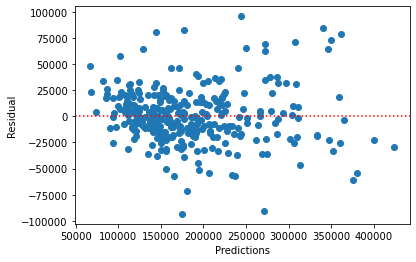

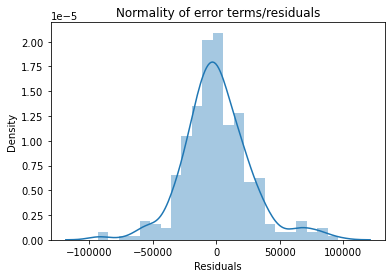

In [62]:
y_res = y_test - y_pred_test


plt.scatter( y_pred_test , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

- Now we will build a regularized models check the results further

# APPROACH 2 (Regularized Model Building with Ridge and Lasso) 

In [63]:
print(sales_Data.shape)
sales_Data.head()

(1046, 101)


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         65.0     8450       196.0         706        150          856   
1         80.0     9600         0.0         978        284         1262   
2         68.0    11250       162.0         486        434          920   
3         60.0     9550         0.0         216        540          756   
4         84.0    14260       350.0         655        490         1145   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0       856       854       1710             1         2         1   
1      1262         0       1262             0         2         0   
2       920       866       1786             1         2         1   
3       961       756       1717             1         1         0   
4      1145      1053       2198             1         2         1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2         548           0           61   
1             6           1           2         460         298            0   
2             6           1           2         608           0           42   
3             7           1           3         642           0           35   
4             9           1           3         836         192           84   

   EnclosedPorch  SalePrice  MSSubClass_30  MSSubClass_50  MSSubClass_60  \
0              0     208500              0              0              1   
1              0     181500              0              0              0   
2              0     223500              0              0              1   
3            272     140000              0              0              0   
4              0     250000              0              0              1   

   MSZoning_RL  MSZoning_RM  LotShape_Reg  LotConfig_CulDSac  \
0            1            0             1                  0   
1            1            0             1                  0   
2            1            0             0                  0   
3            1            0             0                  0   
4            1            0             0                  0   

   Neighborhood_Edwards  Neighborhood_IDOTRR  Neighborhood_NAmes  \
0                     0                    0                   0   
1                     0                    0                   0   
2                     0                    0                   0   
3                     0                    0                   0   
4                     0                    0                   0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     1                     0                     0   

   Neighborhood_Somerst  Neighborhood_StoneBr  HouseStyle_2Story  \
0                     0                     0                  1   
1                     0                     0                  0   
2                     0                     0                  1   
3                     0                     0                  1   
4                     0                     0                  1   

   OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  OverallQual_8  \
0              0              0              0              1              0   
1              0              0              1              0              0   
2              0              0              0              1              0   
3              0              0              0              1              0   
4              0              0              0              0              1   

   OverallQual_9  OverallQual_10  OverallCond_5  OverallCond_6  OverallCond_7  \
0

In [64]:
# Before building regularized model we will first data in train and test

y = sales_Data['SalePrice']
X = sales_Data.drop(['SalePrice'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


# For regularized regression first we need to scale all the features before model building
scaler = MinMaxScaler()

col_scale_list = X_train.columns

for i in col_scale_list:
    X_train[i] = scaler.fit_transform(X_train[[i]])
    X_test[i] = scaler.transform(X_test[[i]])

X_train.head()

(732, 100)
(732,)
(314, 100)
(314,)


LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
1307     0.318584  0.088968     0.00000    0.330088   0.104452     0.252610   
97       0.433628  0.130372     0.03000    0.230088   0.188356     0.242171   
303      0.407080  0.114081     0.00000    0.395575   0.000000     0.219207   
1415     0.238938  0.024487     0.08125    0.437168   0.170377     0.390397   
374      0.362832  0.090829     0.00000    0.000000   0.362586     0.202853   

      1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
1307  0.179526  0.000000   0.092118           0.5  0.333333       0.0   
97    0.168067  0.000000   0.084729           0.5  0.333333       0.0   
303   0.142857  0.000000   0.068473           0.5  0.333333       0.0   
1415  0.400688  0.000000   0.234729           0.0  0.666667       0.0   
374   0.124905  0.594609   0.323153           0.0  0.666667       0.5   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
1307      0.222222    0.000000    0.333333    0.260163    0.000000   
97        0.333333    0.000000    0.000000    0.221138    0.140023   
303       0.222222    0.000000    0.333333    0.318699    0.298716   
1415      0.444444    0.333333    0.666667    0.406504    0.166861   
374       0.555556    0.333333    0.333333    0.222764    0.116686   

      OpenPorchSF  EnclosedPorch  MSSubClass_30  MSSubClass_50  MSSubClass_60  \
1307     0.127490            0.0            0.0            0.0            0.0   
97       0.000000            0.0            0.0            0.0            0.0   
303      0.000000            0.0            0.0            0.0            0.0   
1415     0.039841            0.0            0.0            0.0            0.0   
374      0.095618            0.0            0.0            0.0            1.0   

      MSZoning_RL  MSZoning_RM  LotShape_Reg  LotConfig_CulDSac  \
1307          1.0          0.0           1.0                0.0   
97            1.0          0.0           1.0                0.0   
303           1.0          0.0           1.0                0.0   
1415          1.0          0.0           1.0                0.0   
374           1.0          0.0           1.0                0.0   

      Neighborhood_Edwards  Neighborhood_IDOTRR  Neighborhood_NAmes  \
1307                   0.0                  0.0                 0.0   
97                     1.0                  0.0                 0.0   
303                    0.0                  0.0                 0.0   
1415                   0.0                  0.0                 0.0   
374                    0.0                  0.0                 0.0   

      Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
1307                   0.0                   0.0                   0.0   
97                     0.0                   0.0                   0.0   
303                    0.0                   0.0                   0.0   
1415                   0.0                   0.0                   0.0   
374                    0.0                   0.0                   0.0   

      Neighborhood_Somerst  Neighborhood_StoneBr  HouseStyle_2Story  \
1307                   0.0                   0.0                0.0   
97                     0.0                   0.0                0.0   
303                    0.0                   0.0                0.0   
1415                   0.0                   0.0                0.0   
374                    0.0                   0.0                1.0   

      OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  \
1307            0.0            1.0            0.0            0.0   
97              1.0            0.0            0.0            0.0   
303             0.0            1.0            0.0            0.0   
1415            0.0            0.0            0.0            1.0   
374             0.0            0.0            0.0            1.0   

      OverallQual_8  OverallQual_9  OverallQual_10  OverallCond_5  \
1307

In [65]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

### Ridge Regression

In [66]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 4.0}


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


In [74]:
#Fitting Ridge model for alpha = 4.0 and printing coefficients which have been penalised
alpha = 4.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 17121.67808139  32602.24910604  16431.53962337  26505.52799255
   2079.75965268  28530.92440561  32138.0089269   29706.03698748
  38318.5105645    9434.08773781   4935.84507104  12320.1593139
  27510.48662232  21661.04394421  19812.19170698  20023.6776879
  16351.15171222   7437.75317548  -3019.47554874  -6021.14104886
  -6243.69136801   5351.42732483  -1815.96659664  -5359.14241231
    398.95829451  14780.96181455 -16724.19006208  -5747.21209743
  -6824.7076136   17281.58857808  22095.94660801 -12101.06139139
   3391.61455866  39252.90667106  -6010.23617822 -22822.7839675
 -20729.90008062 -14670.07448469  -2316.48852449  18484.85198702
  42324.5485986   23841.86649539  -4814.257531     4817.99165591
   9987.4187078     845.20813414  -3626.76388642  -2586.96383009
    -90.00761452  -2287.56756291  -1537.58218514   7019.22570842
  -3289.76047155    493.08019016  12500.55526998   4766.16560499
  -6465.3758112  -13403.39353405  -9759.79010845  -3118.35072723
  10257.38170172  18691.9599

In [75]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Training Score:", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Testing Score: ", r2_test_lr)
metric2.append(r2_test_lr)

Training Score: 0.8901653383240501
Testing Score:  0.891501339640209


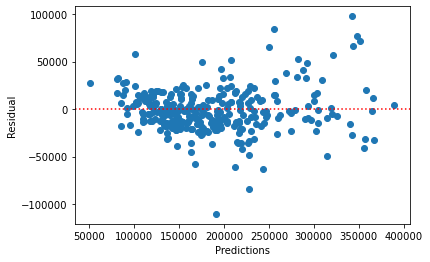

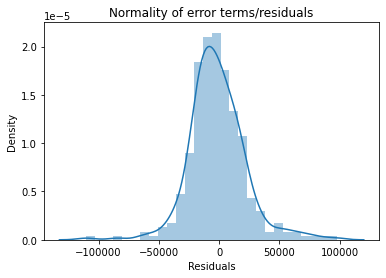

In [76]:
y_res = y_test - y_pred_test


plt.scatter( y_pred_test , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Lasso Regression

In [70]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 100}


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   10.2s finished


In [71]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 1.38846034e+04  5.30301757e+04  4.46061509e+03  3.06033698e+04
 -0.00000000e+00  2.76528444e+04  0.00000000e+00  0.00000000e+00
  1.36747962e+05  7.09946223e+03 -0.00000000e+00  8.56722594e+03
  1.30663052e+04  1.96445074e+04  2.15942038e+04  1.21088505e+04
  1.09308265e+04  0.00000000e+00 -4.94191621e+02 -0.00000000e+00
 -3.34569875e+03  2.69289782e+03 -0.00000000e+00 -2.69466386e+03
  0.00000000e+00  1.29896561e+04 -1.60840016e+04 -6.17405792e+02
 -5.52484408e+03  1.52492337e+04  2.28680522e+04 -1.28233627e+04
  4.37298883e+03  4.75750209e+04 -1.67937996e+03 -1.36456712e+04
 -9.98570038e+03 -3.20674110e+03  8.86411284e+03  3.22236104e+04
  6.43006341e+04  4.57587855e+04 -6.55179426e+03  2.63078087e+03
  8.61556703e+03  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  2.65453477e+03 -0.00000000e+00 -0.00000000e+00  5.76922249e+03
 -2.47732283e+03  0.00000000e+00  1.19993643e+02  1.20079353e+03
 -0.00000000e+00 -1.23587524e+04 -0.00000000e+00  0.00000000e+00
  4.06050809e+03  1.63716

We can observe that many features are assigned coeff 0. Hence those features are redundant and not considered in Lasso.

In [72]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Training Score:", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Testing Score: ", r2_test_lr)
metric2.append(r2_test_lr)

Training Score: 0.8907375496115387
Testing Score:  0.8952708666515213


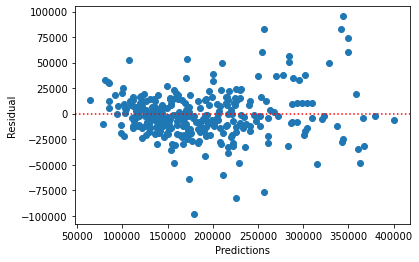

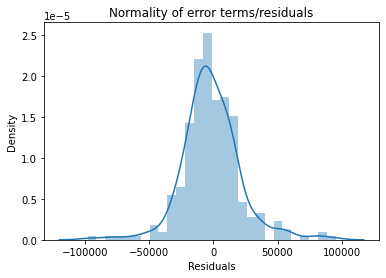

In [73]:
y_res = y_test - y_pred_test


plt.scatter( y_pred_test , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()